In [240]:
import numpy as np
import pandas as pd

In [241]:
df = pd.read_csv('spam.csv', encoding="ISO-8859-1")
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2609,ham,"Awesome, text me when you're restocked",NaN,NaN,NaN
1683,ham,Already am squatting is the new way of walking,NaN,NaN,NaN
3838,ham,Erm Û_ ill pick you up at about 6.45pm. That'...,NaN,NaN,NaN
449,ham,10 min later k...,NaN,NaN,NaN
166,spam,URGENT! We are trying to contact you. Last wee...,NaN,NaN,NaN


DATA CLEANING

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [243]:
#drop last 3 cols
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)


In [244]:
df.sample(5)

,v1,v2
5268,ham,\ER
5339,ham,You'd like that wouldn't you? Jerk!
657,ham,You will be in the place of that man
2852,ham,I doubt you could handle 5 times per night in ...
1128,spam,Ur HMV Quiz cash-balance is currently å£500 - ...


In [245]:
#renaming the columns
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.sample()

,target,text
1698,spam,"Free msg. Sorry, a service you ordered from 81..."


In [246]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [247]:
df['target'] = encoder.fit_transform(df['target'])

In [248]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [249]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [250]:
# check for duplicates
df.duplicated().sum()

403

In [251]:
# remove duplicates
df = df.drop_duplicates(keep= 'first')
df.duplicated().sum()

0

In [252]:
df.shape

(5169, 2)

EDA (EXPLORATORY DATA ANALYSIS)

In [253]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [254]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

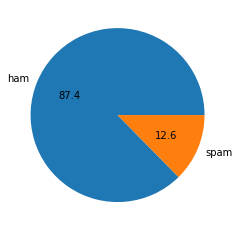

In [255]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.1f")
plt.show()

In [256]:
# Data is imbalanced
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Zohai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Zohai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [257]:
df['num_characters'] = df['text'].apply(len) #TAKING OUT NUM OF CHARS IN EVERY LINE

In [258]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [259]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x))) #TAKING OUT NUM OF WORD IN EVERY LINE 

In [260]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [261]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) #TAKING OUT NUM OF SENTENCES IN EVERY LINE

In [262]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [263]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [264]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [265]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


The analysis shows that spam messages are usually longer than ham messages
 
(LOOK AT THE MEAN AMOUNT OF BOTH THE STATS)

Data Preprocessing

In [266]:
#removing
import string 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

def transform_text(text):
    text = text.lower() #lowercase
    text = nltk.word_tokenize(text) # tokenization
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i) #special characters
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: #stopwords
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [267]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [268]:
df['transformed_text'] = df['text'].apply(transform_text)

In [269]:

df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
